<a href="https://colab.research.google.com/github/scholarmaverick1991/Consumer-Cost-Optimisation-southafrica/blob/main/Outlier_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

Outliers are data points that significantly differ from the rest of the observations in a dataset. They are values that are unusually high or low compared to the majority of the data points, and they can have a substantial impact on statistical analyses and machine learning models. Outliers may arise due to errors in data collection, measurement issues, or genuine anomalies in the underlying process being studied.

In data analysis, identifying outliers is crucial because they can skew statistical measures and produce inaccurate results. Visual analysis of data displays (such as box or scatter plots), statistical testing, and mathematical models are common techniques for identifying outliers.

The context and reason behind the outliers' existence determine how to handle them. Occasionally, anomalies

# **Application:**

In [ ]:
# @title

#Statistics
import pandas as pd
#Visualisation
import seaborn as sns
# Annotation of Visuals
import matplotlib.pyplot as plt
#Visuals
sns.set_theme(rc = {'figure.dpi': 220, 'figure.figsize': (3.5, 3.5)},
              font_scale = 0.85, style = 'whitegrid')
print('all set,you may begin analysis')

all set,you may begin analysis


in our dataset we have choosen a car data set for the purposes of the presentation we will look at ware tare feature of car sale **mileage per year**

The mileage per year of a car serves as a key indicator of its usage and overall condition. It provides valuable information about how extensively the vehicle has been driven over time and can impact various aspects of the car's performance, reliability, and value.

**An aggregated dataset was created using data mined on e-commerce site from 2020 to 2023**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cars_dataset.csv",
                 usecols = ['Price','Year','Mileage','Year_Data_Collected','Car_Model','Make','Town'])
# Feature Engineering
df['Car_Age'] = (df['Year_Data_Collected'])-df['Year']
df['Mileage/Year'] = df['Mileage']/(df['Car_Age']+1)
df[df['Car_Age']>0].describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
Price,27375.0,289465.0,363186.0,0.0,129900.0,169900.0,239899.0,1999999.0
Year,27380.0,2016.0,4.0,1959.0,2014.0,2017.0,2019.0,2022.0
Mileage,27347.0,78414.0,66666.0,0.0,27282.0,65000.0,113000.0,2264003.0
Year_Data_Collected,27380.0,2022.0,1.0,2021.0,2021.0,2021.0,2023.0,2023.0
Car_Age,27380.0,5.0,4.0,1.0,2.0,4.0,7.0,63.0
Mileage/Year,27347.0,12166.0,7319.0,0.0,7667.0,11400.0,15500.0,226400.0


Data Preprocessing techniques are the backbone of the MachIne Learning!
Hence sharing 5 easy ways to handle outliers in python.

1. Z score - it tells you how many standard deviations is a data point away from the mean.

2. Interquartile range (IQR) - it is the difference between 75th and 25th percentile in the data (when sorted). As a thumb rule values below and above 1.5*IQR are considered as outliers.

3. Isolation Forest - Based on decision tree - it leverages the fact that anomalies are typically less frequent and have attribute values that are very different from those of normal instances. It works by randomly selecting a feature and then randomly selecting a split value between the minimum and maximum values of that feature to isolate anomalies into separate partitions.
Contamination parameter suggests "the approx proportion of outliers in the data".

4. Winsorizing - Rather than removing outliers from data we replace them with mean/values which are in the centre of distribution.

5. Visualisation - Using packages like matplotlib and seaborn you can visualise and identify outliers from your data by plotting histrograms, scatter plots etc.


[Machine Learning Resources](https://github.com/datascienceid/machine-learning-resources)

# **Z-Score**

---



**z = (X – μ) / σ**

where,
z = Z-Score,
X = The value of the element,
μ = The population mean, and
σ = The population standard deviation

<Axes: xlabel='Z_Score', ylabel='Count'>

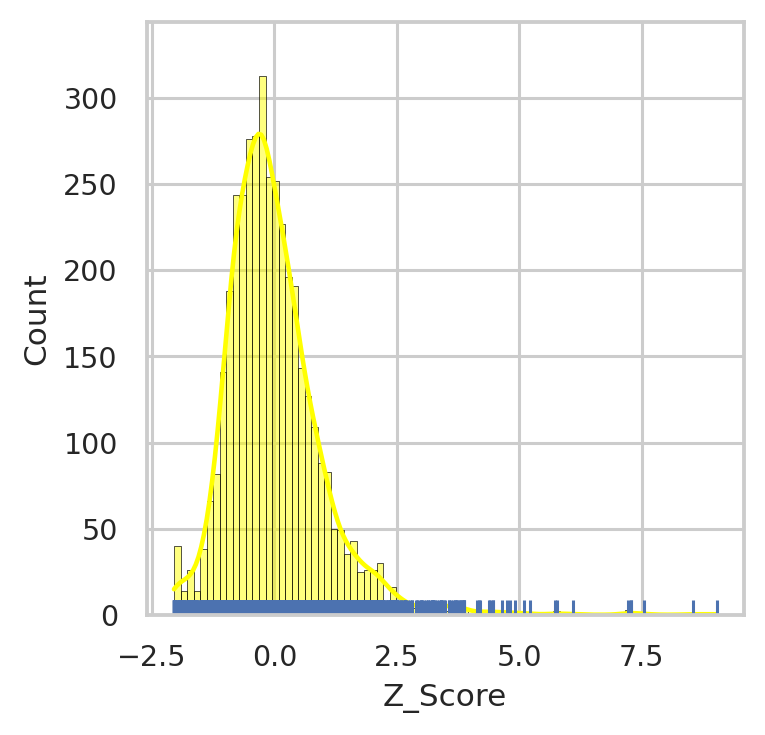

In [ ]:
cars_df['Z_Score'] = (cars_df['Milage/Year']-cars_df['Milage/Year'].mean())/cars_df['Milage/Year'].std()
sns.histplot(cars_df, x = 'Z_Score', kde = True,color = 'yellow' ,edgecolor = 'black')
sns.rugplot(cars_df, x = 'Z_Score', color = 'b')

<Axes: xlabel='Z_Score', ylabel='Count'>

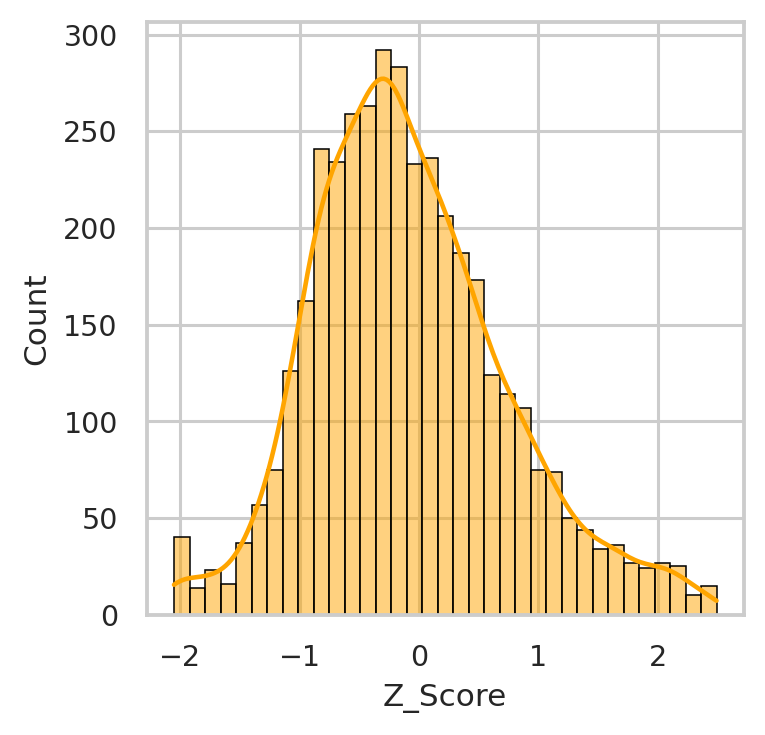

In [ ]:
#create filter containers

sns.histplot(cars_df[(cars_df['Z_Score']>-2.5)&(cars_df['Z_Score']<2.5)], x = 'Z_Score', kde = True,color = 'orange' ,edgecolor = 'black')

# **Quantile Filtratration**

---



In [ ]:
df.quantile([0,0.25, 0.75,1], numeric_only = True)

,Cost,Milage,Year,Z_Score
0.00,22900.0,0.00,1959.0,-2.077229
0.25,69950.0,108000.00,2006.0,-0.760467
0.75,94999.0,215713.25,2013.0,0.552798
1.00,100000.0,687000.00,2023.0,6.298836


In [ ]:
iqr = car_df

# **Standard Deviation**

---



The standard deviation is a measure of the dispersion or spread of a dataset. It quantifies the average distance of each data point from the mean of the dataset. Mathematically, the standard deviation (σ) is calculated as the square root of the variance (σ^2), where the variance is the average of the squared differences between each data point and the mean.

In [ ]:
df.std(numeric_only = True).round(2)

Cost           16466.88
Milage         82019.42
Year               6.19
Car_Age            6.19
Milage/Year     5969.49
dtype: float64

# **Isolation Forest**